# Projeto 1 - Ciência dos Dados#

Nome: Daniel Minson Pucciariello

## Perguntas a serem respondidas

Esse projeto tem como objetivo analisar como a ação da UNAIDS alterou a quantidade de novas pessoas infectadas por HIV, vírus precursor da AIDS, que gerou uma quantidade estrondosa de mortes no mundo todo. O vírus pode ser passado para pessoas próximas do infectado caso não seja neutralizado com um coquetel de remédio conhecidos como antirretrovirais (ART). Mais precisamente, ele pretende responder à seguinte pergunta:

A disponibilidade de "auto-teste" de HIV (self test) em países do oeste e sul da África permitiu que uma maior quantidade de pessoas se diagnosticassem e passasem a tomar antirretrovirais, ocasionando uma diminuição no número de novas infeçcões?

## Explicação da hipótese e mecanismo
Anteriormente ao estudo ser realizado, se espera que a existência de self-test em determinados países tenha levado à diminuição da taxa de novas infecções quando comparado à países onde este não está disponível, visto que, mediante à percepção de que se está infectado, a população tenderia à tomar remédios antirretrovirais e isso impediria que tal pessoa infectasse outras, ocasionando uma queda no número de novos infectados.

Visto que se possui dados de 2017 acerca da existencia ou não de self-test em países do sul e oeste da África (recorte intencional, visto que é a região com maior incidencia de casos de HIV e AIDS), se espera usar de dados como o de novos infectados e de pessoas utilizando antirretrovirais (no ano posterior, 2018) para se chegar à uma conclusâo.

## Bases de dados utilizadas
Adultos com HIV - https://docs.google.com/spreadsheet/pub?key=pyj6tScZqmEfbZyl0qjbiRQ&output=xlsx

IDH - https://docs.google.com/spreadsheet/pub?key=tyadrylIpQ1K_iHP407374Q&output=xlsx

População total - https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&output=xlsx

Expectativa de vida - https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj2tPLxKvvnNPA&output=xlsx

https://docs.google.com/spreadsheet/pub?key=0ArfEDsV3bBwCdHZJdFBhYVlvck43d1R6ZFYzUWpiLWc&output=xlsx

People living with HIV - https://aidsinfo.unaids.org?did=5581277ae9beccab3bd5a44e&r=world&t=null&tb=c&bt=undefined&ts=&cl=AGO,BWA,COM,ERI,ETH,KEN,LSO,MDG,MWI,MUS,MOZ,NAM,RWA,ZAF,SSD,SWZ,UGA,TZA,ZMB,ZWE&cr=n&ct=2017&cav=Population

People living with HIV receiving ART (#) - https://aidsinfo.unaids.org/?did=5b4e88c8dddb54192bb396ec&r=world&t=null&tb=c&bt=undefined&ts=&cl=AGO,BWA,COM,ERI,ETH,KEN,LSO,MDG,MWI,MUS,MOZ,NAM,RWA,ZAF,SSD,SWZ,UGA,TZA,ZMB,ZWE&cr=n&ct=2017&cav=Population

Dados de novas infecções (newly infected) - https://aidsinfo.unaids.org?did=554c9b9c05b5b281750af202&r=world&t=null&tb=c&bt=undefined&ts=&cl=AGO,BWA,COM,ERI,ETH,KEN,LSO,MDG,MWI,MUS,MOZ,NAM,RWA,ZAF,SSD,SWZ,UGA,TZA,ZMB,ZWE&cr=n&ct=2017&cav=Population


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
deaths = pd.read_excel("Indicator_Annual number of AIDS deaths.xlsx")
peoplewithaids = pd.read_excel("indicator_hiv_plwha.xlsx")
newlyinfected = pd.read_excel("Indicator_Estimated new HIV cases All ages.xlsx")
totalpopulation = pd.read_excel("population_total_updated.xlsx")

#https://aidsinfo.unaids.org/
newlyinfected_south_eastern_africa_2018 = pd.read_excel("New HIV infections_Number of new HIV infections_Population_2018.xlsx")
newlyinfected_south_eastern_africa_2017 =pd.read_excel("New HIV infections_Number of new HIV infections_Population_2017.xlsx")
receivingART_south_eastern_africa_2017 = pd.read_excel("Treatment cascade_People living with HIV receiving ART (#)_Population_ All ages_2017.xlsx")
receivingART_south_eastern_africa_2018 = pd.read_excel("Treatment cascade_People living with HIV receiving ART (#)_Population_ All ages_2018.xlsx")
livingwithHIV2017 = pd.read_excel("People living with HIV 2017.xlsx")
livingwithHIV2018 = pd.read_excel("People living with HIV 2018.xlsx")

In [3]:
deaths=deaths.rename(columns = {"Annual number of AIDS deaths":'Mortes por AIDS'})
deaths_idx=deaths.set_index("Mortes por AIDS")
deaths_idx.columns = deaths_idx.columns.astype(int)
deaths_idx=deaths_idx.dropna()

peoplewithaids=peoplewithaids.rename(columns = {"People living with HIV":'Pessoas vivendo com HIV', "1996": 1996, "2001":2001})
peoplewithaids_idx=peoplewithaids.set_index("Pessoas vivendo com HIV")
peoplewithaids_idx=peoplewithaids_idx.dropna()

newlyinfected=newlyinfected.rename(columns={"Estimated new HIV infections":"Incidencia de HIV em novas pessoas"})
newlyinfected_idx=newlyinfected.set_index("Incidencia de HIV em novas pessoas")
newlyinfected_idx=newlyinfected_idx.dropna()

totalpopulation=totalpopulation.rename(columns={"country":"População total"})
totalpopulation_idx=totalpopulation.set_index("População total")
totalpopulation_idx=totalpopulation_idx.dropna()

newlyinfected_south_eastern_africa_2017=newlyinfected_south_eastern_africa_2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Novos infectados em 2017"})
newlyinfected_south_eastern_africa_idx2017=newlyinfected_south_eastern_africa_2017.set_index("Países")

newlyinfected_south_eastern_africa_2018=newlyinfected_south_eastern_africa_2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Novos infectados em 2018"})
newlyinfected_south_eastern_africa_idx2018=newlyinfected_south_eastern_africa_2018.set_index("Países")

receivingART_south_eastern_africa_2017=receivingART_south_eastern_africa_2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Recebendo ART em 2017"})
receivingART_south_eastern_africa_idx2017=receivingART_south_eastern_africa_2017.set_index("Países")

receivingART_south_eastern_africa_2018=receivingART_south_eastern_africa_2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Recebendo ART em 2018"})
receivingART_south_eastern_africa_idx2018=receivingART_south_eastern_africa_2018.set_index("Países")

livingwithHIV2017=livingwithHIV2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Pessoas com HIV em 2017"})
livingwithHIV2017_idx=livingwithHIV2017.set_index("Países")

livingwithHIV2018=livingwithHIV2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Pessoas com HIV em 2018"})
livingwithHIV2018_idx=livingwithHIV2018.set_index("Países")

In [4]:
#convertendo tabelas e plotando comportamento relativo médio
peoplewithaids_num = peoplewithaids_idx.apply(pd.to_numeric)
totalpopulation_num = totalpopulation_idx.apply(pd.to_numeric)
peoplewithaids_num.columns = peoplewithaids_num.columns.astype(int)
totalpopulation_num.columns = totalpopulation_num.columns.astype(int)

comportamentorelativo_peoplewithaids= peoplewithaids_num/totalpopulation_num*100


**Gráfico de comportamento relativo ao longo dos anos - PESSOAS COM AIDS**

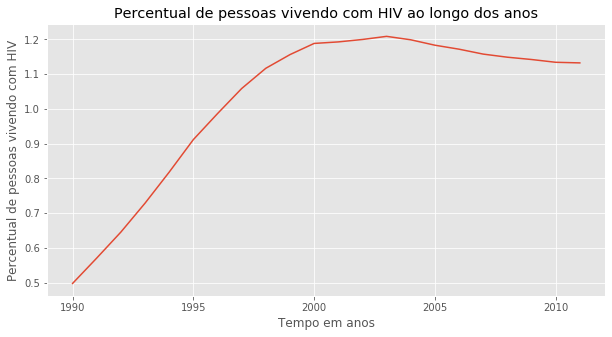

In [5]:
plt.figure(figsize=(10,5))
plt.plot(comportamentorelativo_peoplewithaids.mean().index, comportamentorelativo_peoplewithaids.mean())
plt.xlabel("Tempo em anos")
plt.ylabel("Percentual de pessoas vivendo com HIV")
plt.title("Percentual de pessoas vivendo com HIV ao longo dos anos")
plt.show()

**Comportamento relativo médio - MORTE - todos os países**

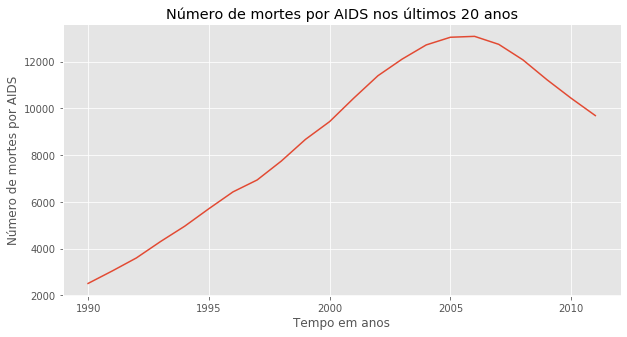

In [6]:
deaths_num = deaths_idx.apply(pd.to_numeric)
deaths_num.columns = deaths_num.columns.astype(int)

plt.figure(figsize=(10,5))
plt.plot(deaths_num.mean().index, deaths_num.mean())
plt.xlabel("Tempo em anos")
plt.ylabel("Número de mortes por AIDS")
plt.title("Número de mortes por AIDS nos últimos 20 anos")
plt.show()

**Comportamento relativo médio - NOVAS INFECÇÕES - todos os países**

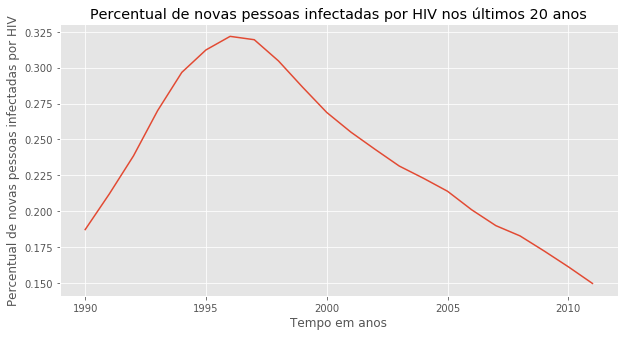

In [7]:
newlyinfected_idx = newlyinfected_idx.apply(pd.to_numeric)
newlyinfected_idx.columns = newlyinfected_idx.columns.astype(int)

comportamentorelativo_novosinfectados= newlyinfected_idx/totalpopulation_num*100

plt.figure(figsize=(10,5))
plt.plot(comportamentorelativo_novosinfectados.mean().index, comportamentorelativo_novosinfectados.mean())
plt.xlabel("Tempo em anos")
plt.ylabel("Percentual de novas pessoas infectadas por HIV")
plt.title("Percentual de novas pessoas infectadas por HIV nos últimos 20 anos")
plt.show()

In [8]:
selftest_not_available=["Angola", "Ethiopia", "Rwanda", 'Uganda', 'Zambia','Botswana']

juncaodosdados=receivingART_south_eastern_africa_idx2017.join(receivingART_south_eastern_africa_idx2018, how="inner")
juncaodosdados=juncaodosdados.join(newlyinfected_south_eastern_africa_idx2017, how="inner")
juncaodosdados=juncaodosdados.join(newlyinfected_south_eastern_africa_idx2018, how="inner")
juncaodosdados=juncaodosdados.join(livingwithHIV2017_idx, how="inner")
juncaodosdados=juncaodosdados.join(livingwithHIV2018_idx, how="inner")

juncaodosdados["livingwithHIV2017_idx"] = livingwithHIV2017_idx
juncaodosdados["livingwithHIV2018_idx"] = livingwithHIV2018_idx

juncaodosdados.loc[:, "selftestavailable"] = "sim"
juncaodosdados.loc[selftest_not_available, "selftestavailable"] = "não"

selftest_status_2017= juncaodosdados.selftestavailable.value_counts()
juncaodosdados.head()

,Recebendo ART em 2017,Recebendo ART em 2018,Novos infectados em 2017,Novos infectados em 2018,Pessoas com HIV em 2017,Pessoas com HIV em 2018,livingwithHIV2017_idx,livingwithHIV2018_idx,selftestavailable
Países,,,,,,,,,
Angola,78721,88734,29000,28000,320000,330000,320000,330000,não
Botswana,285983,307377,9000,8500,370000,370000,370000,370000,não
Comoros,95,96,0,0,120,120,120,120,sim
Eritrea,8795,8907,610,580,18000,18000,18000,18000,sim
Ethiopia,437555,449962,23000,23000,680000,690000,680000,690000,não


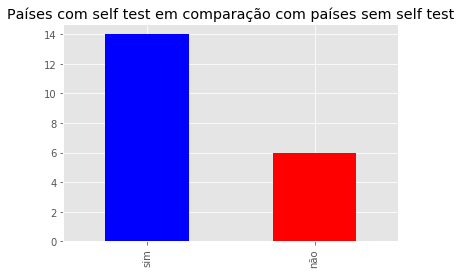

In [9]:
selftest_status_2017.plot(kind='bar', color=('blue', 'red'), legend=False);
plt.title("Países com self test em comparação com países sem self test")
plt.show()

**BoxPlot relativo de pessoas recebem ART**

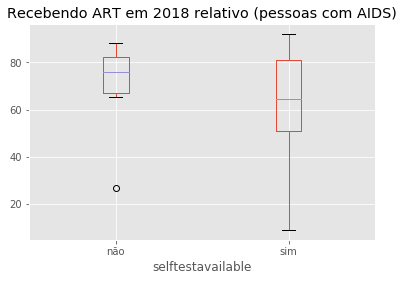

In [10]:
juncaodosdados["Recebendo ART em 2018 relativo (novosinfectados)"]=juncaodosdados["Recebendo ART em 2018"]/juncaodosdados["Novos infectados em 2018"]*100
juncaodosdados["Recebendo ART em 2017 relativo (novosinfectados)"]=juncaodosdados["Recebendo ART em 2017"]/juncaodosdados["Novos infectados em 2017"]*100

juncaodosdados["Recebendo ART em 2018 relativo (pessoas com AIDS)"]=juncaodosdados["Recebendo ART em 2018"]/juncaodosdados["Pessoas com HIV em 2018"]*100
juncaodosdados["Recebendo ART em 2017 relativo (pessoas com AIDS)"]=juncaodosdados["Recebendo ART em 2017"]/juncaodosdados["Pessoas com HIV em 2017"]*100

juncaodosdados["Recebendo ART em 2018 relativo (pop_total)"]=juncaodosdados["Recebendo ART em 2018"]/totalpopulation_idx[2018]*100
juncaodosdados["Recebendo ART em 2017 relativo (pop_total)"]=juncaodosdados["Recebendo ART em 2017"]/totalpopulation_idx[2017]*100

juncaodosdados.boxplot(column="Recebendo ART em 2018 relativo (pessoas com AIDS)", by="selftestavailable");
plt.suptitle("");

print("O ")

Gráfico de dispersão que mostra a frequencia de distribuição dos dados de acordo com o fato de existir ou não self-test no grupo de países analisados. 


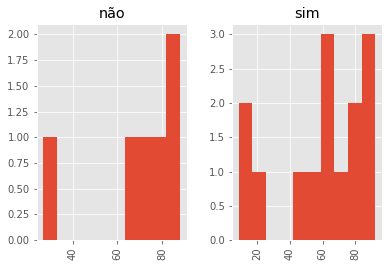

In [43]:
juncaodosdados.hist(column="Recebendo ART em 2018 relativo (pessoas com AIDS)", by="selftestavailable");
print("Gráfico de dispersão que mostra a frequencia de distribuição dos dados de acordo com o fato de existir ou não self-test no grupo de países analisados. ")

In [12]:
serie_com_self_test = pd.DataFrame(columns=[2017, 2018])
serie_sem_self_test = pd.DataFrame(columns=[2017, 2018])

serie_com_self_test[2017]=juncaodosdados[juncaodosdados.selftestavailable == "sim"]["Recebendo ART em 2017 relativo (pessoas com AIDS)"]
serie_com_self_test[2018]=juncaodosdados[juncaodosdados.selftestavailable == "sim"]["Recebendo ART em 2018 relativo (pessoas com AIDS)"]

serie_sem_self_test[2017]=juncaodosdados[juncaodosdados.selftestavailable == "não"]["Recebendo ART em 2017 relativo (pessoas com AIDS)"]
serie_sem_self_test[2018]=juncaodosdados[juncaodosdados.selftestavailable == "não"]["Recebendo ART em 2018 relativo (pessoas com AIDS)"]

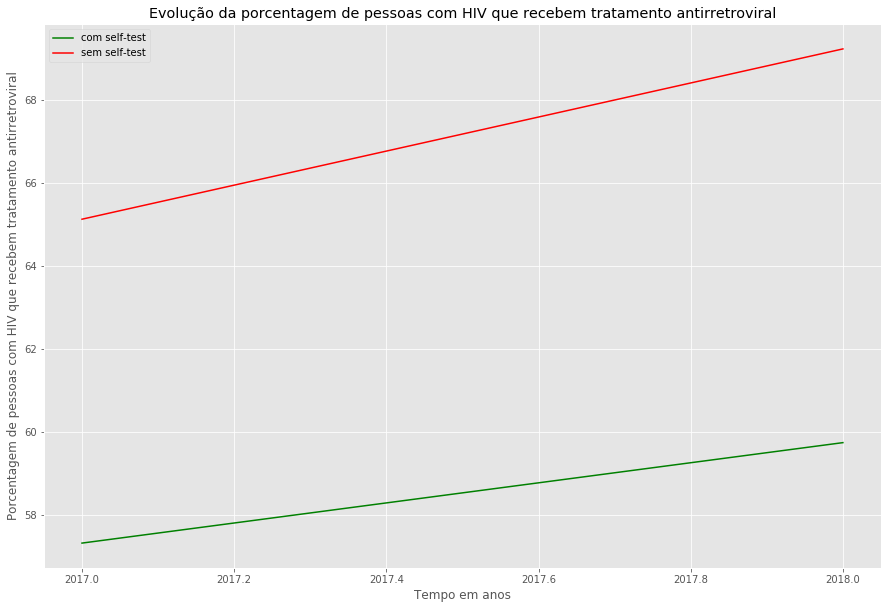

Como se pode ver, o gráfico abaixo demonstra que, de 2017 para 2018, o crescimento porcentual de pessoas que recebem tratamento antirretroviral não acompanhou a tendencia esperada, ou seja, o tratamento por ART deveria crescesse mais em paises onde o self-test estava disponível do que em paises que não estava.


In [38]:
plt.figure(figsize=(15,10))
plt.plot(serie_com_self_test.mean().index, serie_com_self_test.mean(),"green", label="com self-test")
plt.plot(serie_sem_self_test.mean().index, serie_sem_self_test.mean(),"red", label="sem self-test")
plt.legend()
plt.title("Evolução da porcentagem de pessoas com HIV que recebem tratamento antirretroviral")
plt.xlabel("Tempo em anos")
plt.ylabel("Porcentagem de pessoas com HIV que recebem tratamento antirretroviral")
plt.show()
print("Como se pode ver, o gráfico abaixo demonstra que, de 2017 para 2018, o crescimento porcentual de pessoas que recebem tratamento antirretroviral não acompanhou a tendencia esperada, ou seja, o tratamento por ART deveria crescesse mais em paises onde o self-test estava disponível do que em paises que não estava.")

In [14]:
juncaodosdados["Percentual de novos infectados em 2017"]=juncaodosdados["Novos infectados em 2017"]/totalpopulation_idx[2017]*1000
juncaodosdados["Percentual de novos infectados em 2018"]=juncaodosdados["Novos infectados em 2018"]/totalpopulation_idx[2018]*1000

serie_com_self_test_2= pd.DataFrame(columns=[2017, 2018])
serie_sem_self_test_2= pd.DataFrame(columns=[2017, 2018])

serie_com_self_test_2[2017]=juncaodosdados[juncaodosdados.selftestavailable == "sim"]["Percentual de novos infectados em 2017"]
serie_com_self_test_2[2018]=juncaodosdados[juncaodosdados.selftestavailable == "sim"]["Percentual de novos infectados em 2018"]

serie_sem_self_test_2[2017]=juncaodosdados[juncaodosdados.selftestavailable == "não"]["Percentual de novos infectados em 2017"]
serie_sem_self_test_2[2018]=juncaodosdados[juncaodosdados.selftestavailable == "não"]["Percentual de novos infectados em 2018"]

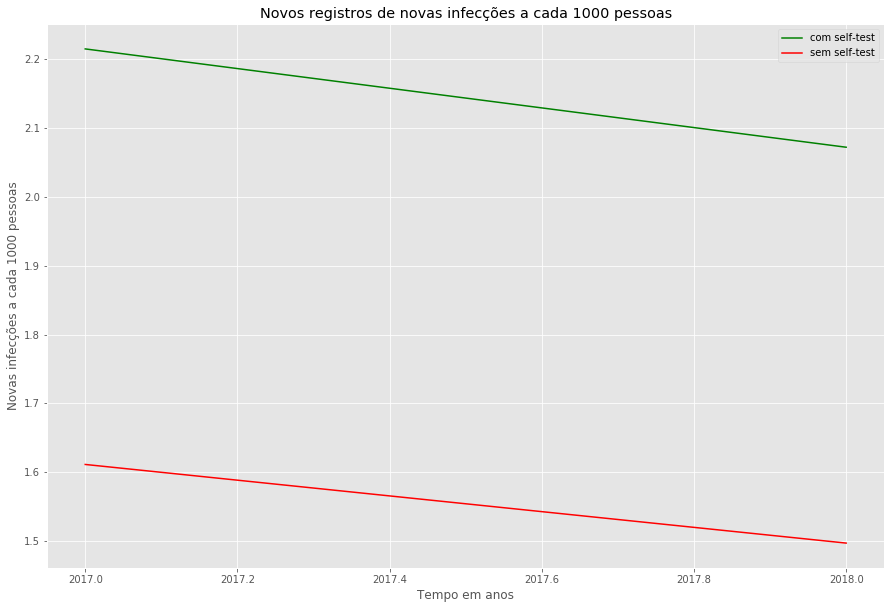

In [15]:
plt.figure(figsize=(15,10))
plt.plot(serie_com_self_test_2.mean().index, serie_com_self_test_2.mean(),"green", label="com self-test")
plt.plot(serie_sem_self_test_2.mean().index, serie_sem_self_test_2.mean(),"red", label="sem self-test")

plt.legend()
plt.title("Novos registros de novas infecções a cada 1000 pessoas")
plt.xlabel("Tempo em anos")
plt.ylabel("Novas infecções a cada 1000 pessoas")
plt.show()

In [26]:
def reta(dados_x, dados_y, c, lab):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    print("Taxa de correlaçâo:", '%06.4f' % (dados_x.corr(dados_y))+"({0})". format(lab))
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8, label=lab)
    plt.title('Correlação entre infecções e consumo de antirretrovirais')
    plt.xlabel('Consumindo antirretrovirais')
    plt.ylabel('novos infectados por HIV')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

Taxa de correlaçâo: 0.1860(2017)
Taxa de correlaçâo: 0.2168(2018)


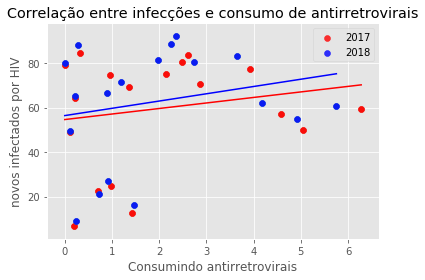

In [27]:
plt.scatter(juncaodosdados["Percentual de novos infectados em 2017"], juncaodosdados["Recebendo ART em 2017 relativo (pessoas com AIDS)"])
reta(juncaodosdados["Percentual de novos infectados em 2017"], juncaodosdados["Recebendo ART em 2017 relativo (pessoas com AIDS)"], "r", "2017")
plt.scatter(juncaodosdados["Percentual de novos infectados em 2018"], juncaodosdados["Recebendo ART em 2018 relativo (pessoas com AIDS)"])
reta(juncaodosdados["Percentual de novos infectados em 2018"], juncaodosdados["Recebendo ART em 2018 relativo (pessoas com AIDS)"], "b", "2018")
plt.legend()
plt.show()

## Conclusão
De acordo com as análises realizadas, é difícil provar que a hipotese apresentada anteriormente faz sentido. Dessa maneira, a resposta para a pergunta é de que não é possível relacionar a disponiblidade de self-test em países do sul e oeste da África à uma possível diminuição na taxa de novas infecções, o que provavelmente é algo que se pode esperar também de outros lugares do mundo. Entre os possíveis motivos para isso está a amostra relativamamente pequena de tempo onde ocorreu a análise, visto que a quantidade de dados era reduzida. Além disso, os dados utilizados para fazer a correlação entre novas infecções por HIV e consumo de antirretrovirais eram aproximados pela própria UNAIDS.

Embora a primeira referência abaixo demonstre que a existência de self-test, nesse caso no Malawi, tenha relação com um aumento da quantidade de humanos sendo tratados, a segunda referência aponta que o self-test é uma tecnologia que não é exatamente barata, de modo muitos dos casos que realmente precisariam ser diagnosticados não são, justamente por impossibilidade econômica de obtenção do material. A terceira referência apresenta diversos argumentos à favor e contra o self-testing. Se mostra particularmente interessante o fato de que mesmo as pessoas que se "auto-diagnosticam", nem sempre possuem instrução suficiente para se submeter rapidamente à um tratamento como o consumo de antirretrovirais, algo que certamente se relaciona com a conclusão obtida.

1: https://www.aidsmap.com/news/mar-2013/self-testing-and-home-treatment-initiation-triples-uptake-hiv-treatment-malawi

AIDSMAP. **Self-testing and home treatment initiation triples uptake of HIV treatment in Malawi.** Disponível em: https://www.aidsmap.com/news/mar-2013/self-testing-and-home-treatment-initiation-triples-uptake-hiv-treatment-malawi. Acesso em: 29 ago. 2019.

2: https://www.infectiousdiseaseadvisor.com/home/topics/hiv-aids/insight-into-the-hiv-self-testing-debate/

INFECTIONS DISEASE ADVISOR. **Insight Into the HIV Self-Testing Debate.** Disponível em: https://www.infectiousdiseaseadvisor.com/home/topics/hiv-aids/insight-into-the-hiv-self-testing-debate/. Acesso em: 29 ago. 2019.

3: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4126574/

AMA	Wood BR, Ballenger C, Stekler JD. **Arguments for and against HIV self-testing. HIV AIDS (Auckl).** 2014;6:117–126. Published 2014 Aug 2. doi:10.2147/HIV.S49083

MLA	Wood, Brian R et al. **“Arguments for and against HIV self-testing.” HIV/AIDS (Auckland, N.Z.)** vol. 6 117-26. 2 Aug. 2014, doi:10.2147/HIV.S49083

APA	Wood, B. R., Ballenger, C., & Stekler, J. D. (2014). **Arguments for and against HIV self-testing. HIV/AIDS (Auckland, N.Z.)**, 6, 117–126. doi:10.2147/HIV.S49083

NLM	Wood BR, Ballenger C, Stekler JD. **Arguments for and against HIV self-testing. HIV AIDS (Auckl)**. 2014 Aug 2;6:117-26. doi: 10.2147/HIV.S49083. PubMed PMID: 25114592; PubMed Central PMCID: PMC4126574.